In [2]:
# YOU MUST MANUALLY DELETE `results` LIST
# IF YOU WANT TO START OVER WITH AN EMPTY HYPERPARAMETER TABLE

# results = []
try:
    assert len(results) > 0
    display(df_results.round(3))
except:
    results = []
    display(results)

[]

In [3]:
# YOU MUST MANUALLY CHANGE RANDOM `seed` OR `test_size` 
# IF YOU WANT TO GET NEW MODEL FITS AND `train_test_split`s

hyperparams = dict(test_size=.2, seed=0)
try:
    display(pd.Series(hyperparams))
except:
    hyperparams = dict(test_size=.2, seed=0)
    display(pd.Series(hyperparams))

test_size    0.2
seed         0.0
dtype: float64

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

np.random.seed(hyperparams['seed'])
sns.set()  # seaborn settings that make prettier plots
pd.options.display.max_columns = 500
pd.options.display.max_rows = 40
pd.options.display.max_colwidth = 100

1. Visit https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
2. Find a link to the text file called 'diabetes.rwrite1.txt' behind a link named **[The data]()**
3. Copy the full URL (https://www4.stat.ncsu.edu/....rwrite1.txt)
4. paste the URL below to replace the placeholder text:

In [18]:
url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.rwrite1.txt'

### BEGIN SOLUTION
url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.rwrite1.txt'
### END SOLUTION

In [19]:
assert(url.endswith('diabetes.rwrite1.txt'))
df = pd.read_csv(url, sep=r'\s+', engine='python')
blood_test_names = list(df.columns)[-7:-1]
assert(sorted(blood_test_names) == sorted('tc ldl hdl tch ltg glu'.split()))
df.head()

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135


In [12]:
df.round(2)

,age,sex,bmi,map,tc,ldl,hdl,tch,ltg,glu,y
0,0.04,0.05,0.06,0.02,-0.04,-0.03,-0.04,-0.00,0.02,-0.02,151
1,-0.00,-0.04,-0.05,-0.03,-0.01,-0.02,0.07,-0.04,-0.07,-0.09,75
2,0.09,0.05,0.04,-0.01,-0.05,-0.03,-0.03,-0.00,0.00,-0.03,141
3,-0.09,-0.04,-0.01,-0.04,0.01,0.02,-0.04,0.03,0.02,-0.01,206
4,0.01,-0.04,-0.04,0.02,0.00,0.02,0.01,-0.00,-0.03,-0.05,135
...,...,...,...,...,...,...,...,...,...,...,...
437,0.04,0.05,0.02,0.06,-0.01,-0.00,-0.03,-0.00,0.03,0.01,178
438,-0.01,0.05,-0.02,-0.07,0.05,0.08,-0.03,0.03,-0.02,0.04,104
439,0.04,0.05,-0.02,0.02,-0.04,-0.01,-0.02,-0.01,-0.05,0.02,132
440,-0.05,-0.04,0.04,0.00,0.02,0.02,-0.03,0.03,0.04,-0.03,220


The `diabetes.tab.txt` url will load a dataset with the original unnormalized units (age in years, blood pressure in mmHg, gender as 1 for female, 2 for male.
The `diabetes.rwrite1.txt` url will load a dataset with standardized values for each feature, but more informative column names. In both data sets, here is what the names mean.
0. age: in years  
1. sex: 1=male, 2=female  
2. bmi: body mass index >35=obese, >30=overweight, <18.5=underweight  
3. bp/map: mean arterial pressure (blood pressure, systolic+diastolic divided by 2)  
4. s1/tc: TC level is a measure of a B12 transportation molecule that is not bound to B12 yet. I high ratio of holotranscobalamin (holo TC or TCH) to transcobalamin (TC) indicates healthy availability of B12 for absorption. TCH above 50 pmol/liter is considered good.  
5. s2/ldl: Low density lipid (good cholesterol)   
6. s3/hdl: High density Lipid cholesterol (bad cholesterol)  
7. s4/tch: holo TC level? (B12 bound tot he transport molecule, **t**rans**c**obalamin, to create **h**olo**t**rans**c**obalamin), <35pmol/L=B12deficiency, >50pmol/L=goodB12  
8. s5/ltg:  
9. s6/glu: glucose level  
10. y: a quantitative measure of disease progression one year after baseline  

In [20]:
df.sex.value_counts()


-0.044642    235
 0.050680    207
Name: sex, dtype: int64

In [21]:
df = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', sep='\t')
df.head().round(1)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.9,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.9,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.7,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.9,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.3,80,135


In [2334]:
columns = [name.lower() for name in df.columns]
columns = columns[:-7] + blood_test_names + ['severity']
df.columns = columns
pd.options.display.max_rows = 500
display(df.round(1))
pd.options.display.max_rows = 20

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,severity
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.9,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.9,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.7,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.9,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.3,80,135
5,23,1,22.6,89.0,139,64.8,61.0,2.0,4.2,68,97
6,36,2,22.0,90.0,160,99.6,50.0,3.0,4.0,82,138
7,66,2,26.2,114.0,255,185.0,56.0,4.6,4.2,92,63
8,60,2,32.1,83.0,179,119.4,42.0,4.0,4.5,94,110
9,29,1,30.0,85.0,180,93.4,43.0,4.0,5.4,88,310


In [2335]:
target_names = ['severity']
### BEGIN SOLUTION
feature_names = [name for name in df.columns if name not in target_names]
print(f'feature_names = {feature_names}')
### END SOLUTION


feature_names = ['age', 'sex', 'bmi', 'bp', 'tc', 'ldl', 'hdl', 'tch', 'ltg', 'glu']


In [2336]:
assert sorted(feature_names) == sorted(['age', 'sex', 'bmi', 'bp'] + blood_test_names)

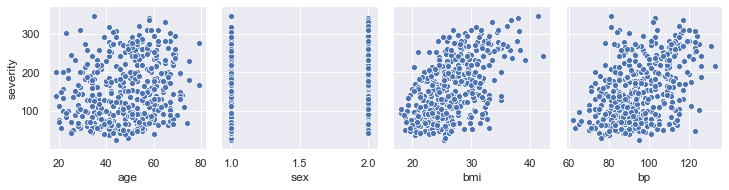

In [2337]:
fig = sns.pairplot(df, x_vars=feature_names[:4], y_vars=target_names)


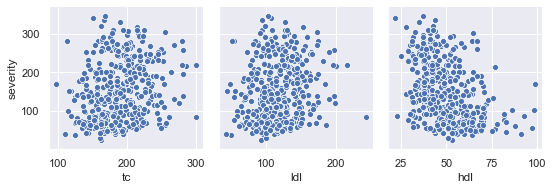

In [2338]:
fig = sns.pairplot(df, x_vars=feature_names[4:7], y_vars=target_names)

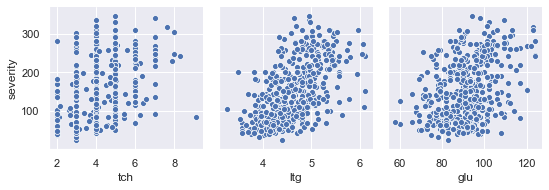

In [2339]:
fig = sns.pairplot(df, x_vars=feature_names[7:], y_vars=target_names)

Create a training and testset.  
The training set is like the question and answer pairs you get to see during a school lesson.  
The test set is like the exam question and answer pairs that the teacher grades you on at the end of the course.  
Use the training set to show your machine learning model the relationship between your features (age, gender, bmi, blood tests etc) and your target variables (diabetes severity).  
You will use the training set to traiin or fit the model.  
You'll use the test set to see how well you model will work (it's accuracy, standard error, precision, recall, etc) in the real world.  
You'll make predictions for the test set "questions" (`X_test`) and see how closely they match the test set answers (`y_test`).

In [2340]:
from sklearn.model_selection import train_test_split
### BEGIN SOLUTION
X_train, X_test, y_train, y_test = train_test_split(df[feature_names], df[target_names], test_size=hyperparams['test_size'])
X_train = pd.DataFrame(X_train, columns=feature_names)
X_test = pd.DataFrame(X_test, columns=feature_names)
y_train = pd.DataFrame(y_train, columns=target_names)
y_test = pd.DataFrame(y_test, columns=target_names)
print(f'X_train.shape: {X_train.shape}; y_train.shape: {y_train.shape}')
print(f' X_test.shape: {X_test.shape};  y_test.shape: {y_test.shape}')
### END SOLUTION

X_train.shape: (353, 10); y_train.shape: (353, 1)
 X_test.shape: (89, 10);  y_test.shape: (89, 1)


In [2341]:
assert len(X_test) <= len(X_train)   # more data in the training set than the test set

In [2342]:
display(X_train.describe(include='all'))

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,48.815864,1.456091,26.420397,94.937649,188.337110,114.515864,49.777620,4.038329,4.635947,91.521246
std,13.027618,0.498775,4.473531,13.980758,34.098324,29.828532,12.901704,1.279738,0.538091,11.303923
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,66.000000
25%,40.000000,1.000000,23.200000,85.000000,164.000000,95.000000,40.000000,3.000000,4.248500,84.000000
50%,51.000000,1.000000,25.600000,93.000000,186.000000,112.200000,48.000000,4.000000,4.574700,91.000000
75%,59.000000,2.000000,29.500000,105.000000,207.000000,131.400000,57.000000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,215.000000,99.000000,8.280000,6.107000,124.000000


In [2343]:
display(y_train.describe(include='all'))

,severity
count,353.000000
mean,151.631728
std,77.882672
min,25.000000
25%,87.000000
50%,140.000000
75%,214.000000
max,341.000000


In [2344]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet

In [2345]:
lr_bmi = LinearRegression()
features = ['bmi']
hyperparams.update({
    'model': lr_bmi.__class__.__name__,
    'num_features': len(features),
    'num_samples': len(X_train)})
results.append(pd.Series(hyperparams))
lr_bmi = lr_bmi.fit(X_train[features],
                y_train)
lr_bmi

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

(353, 1)
[[9.95375331]]
lr_bmi.intercept_: [-111.35]
     lr_bmi.coef_: [[9.95]]


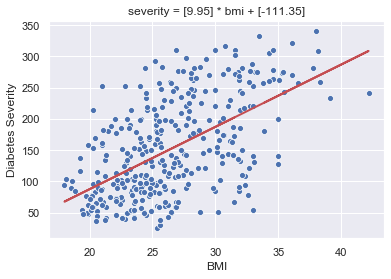

In [2346]:
fig = sns.scatterplot(x=X_train[features[0]], y=y_train[target_names[0]])
print(X_train[features].shape)
print(lr_bmi.coef_)
fig = plt.plot(X_train['bmi'], lr_bmi.predict(X_train[features]).flatten(), color='r', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Diabetes Severity')
plt.title(f'severity = {lr_bmi.coef_.round(2)[0]} * bmi + {lr_bmi.intercept_.round(2)}')
print(f'lr_bmi.intercept_: {lr_bmi.intercept_.round(2)}')
print(f'     lr_bmi.coef_: {lr_bmi.coef_.round(2)}')

In [2347]:
def mae_rmse(y, y_pred):
    e = y_pred - y
    mae = np.sum(np.abs(e)) / len(e_test_bmi)  # .mean()
    rmse = np.sqrt(np.mean(e ** 2))
    return mae[0], rmse[0]

In [2348]:
y_train_pred = lr_bmi.predict(X_train[features])
mae_train_bmi, rmse_train_bmi = mae_rmse(y_train, y_train_pred)
results[-1]['train_score'] = lr_bmi.score(X_train[features], y_train)
results[-1]['train_rmse'] = rmse_train_bmi
results[-1]['train_mae'] = mae_train_bmi
display(pd.DataFrame(results).round(2))

,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
0,0.2,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.2,0,LinearRegression,10,353,0.55,52.29,42.59,0.33,58.52,46.17,-0.13,-23.18,6.07,1.05,-0.91,0.51,0.09,6.29,66.69,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.2,0,ElasticNet,10,353,0.52,53.97,44.64,0.30,59.72,47.09,-0.12,-6.00,6.60,0.96,1.24,-1.44,-2.26,0.07,2.94,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.2,0,Lasso,10,353,0.55,52.67,43.08,0.32,58.88,46.60,-0.10,-18.07,6.33,1.01,0.25,-0.48,-1.40,0.00,34.04,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.2,0,LinearRegression,11,353,0.55,52.27,42.57,0.33,58.79,46.40,-0.12,-23.07,6.10,1.05,-0.83,0.70,0.42,4.28,65.80,0.17,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.2,3,ElasticNet,24,353,0.56,51.87,42.34,0.41,56.29,44.56,-1.11,-0.84,-0.79,-0.59,-1.97,3.22,1.36,0.00,0.00,-4.11,-0.03,0.00,NaN,NaN,0.01,-4.53,0.12,0.01,0.00,-0.01,0.00,0.01,6.22,0.02,0.0,0.00,1.0
88,0.2,3,Ridge,24,353,0.57,51.28,41.43,0.41,56.72,45.01,-1.09,-1.82,-5.43,-0.19,-5.49,7.99,7.93,10.12,-23.64,-6.64,-0.07,-5.91,NaN,NaN,0.01,-5.47,0.20,0.01,0.01,-0.02,-0.02,-0.50,13.34,0.04,0.0,0.52,1.0
89,0.2,3,Ridge,24,353,0.54,52.80,43.45,0.39,57.35,45.42,-0.80,-0.80,-0.36,-0.61,-0.44,1.60,0.21,0.10,0.37,-1.76,-0.03,0.06,NaN,NaN,0.01,-2.39,0.12,0.01,0.00,-0.01,0.00,-0.06,2.90,0.01,0.0,0.16,1000.0
90,0.2,3,Lasso,24,353,0.51,54.49,44.97,0.36,59.00,47.16,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.01,0.00,NaN,NaN,0.00,-0.00,0.12,0.01,0.00,-0.00,-0.01,0.00,0.00,0.00,0.0,0.00,100.0


In [2349]:
### BEGIN SOLUTION
y_test_pred = lr_bmi.predict(X_test[features])
# print(f'y_test_pred.shape: {y_test_pred.shape}')
mae_test_bmi, rmse_test_bmi = mae_rmse(y_test, y_test_pred)
results[-1]['test_score'] = lr_bmi.score(X_test[features], y_test)
results[-1]['test_rmse'] = rmse_test_bmi
results[-1]['test_mae'] = mae_test_bmi
display(pd.DataFrame(results).round(2))
### END SOLUTION

,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
0,0.2,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.2,0,LinearRegression,10,353,0.55,52.29,42.59,0.33,58.52,46.17,-0.13,-23.18,6.07,1.05,-0.91,0.51,0.09,6.29,66.69,0.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.2,0,ElasticNet,10,353,0.52,53.97,44.64,0.30,59.72,47.09,-0.12,-6.00,6.60,0.96,1.24,-1.44,-2.26,0.07,2.94,0.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.2,0,Lasso,10,353,0.55,52.67,43.08,0.32,58.88,46.60,-0.10,-18.07,6.33,1.01,0.25,-0.48,-1.40,0.00,34.04,0.23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.2,0,LinearRegression,11,353,0.55,52.27,42.57,0.33,58.79,46.40,-0.12,-23.07,6.10,1.05,-0.83,0.70,0.42,4.28,65.80,0.17,-0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.2,3,ElasticNet,24,353,0.56,51.87,42.34,0.41,56.29,44.56,-1.11,-0.84,-0.79,-0.59,-1.97,3.22,1.36,0.00,0.00,-4.11,-0.03,0.00,NaN,NaN,0.01,-4.53,0.12,0.01,0.00,-0.01,0.00,0.01,6.22,0.02,0.0,0.00,1.0
88,0.2,3,Ridge,24,353,0.57,51.28,41.43,0.41,56.72,45.01,-1.09,-1.82,-5.43,-0.19,-5.49,7.99,7.93,10.12,-23.64,-6.64,-0.07,-5.91,NaN,NaN,0.01,-5.47,0.20,0.01,0.01,-0.02,-0.02,-0.50,13.34,0.04,0.0,0.52,1.0
89,0.2,3,Ridge,24,353,0.54,52.80,43.45,0.39,57.35,45.42,-0.80,-0.80,-0.36,-0.61,-0.44,1.60,0.21,0.10,0.37,-1.76,-0.03,0.06,NaN,NaN,0.01,-2.39,0.12,0.01,0.00,-0.01,0.00,-0.06,2.90,0.01,0.0,0.16,1000.0
90,0.2,3,Lasso,24,353,0.51,54.49,44.97,0.36,59.00,47.16,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,-0.01,0.00,NaN,NaN,0.00,-0.00,0.12,0.01,0.00,-0.00,-0.01,0.00,0.00,0.00,0.0,0.00,100.0


In [2350]:
features

['bmi']

In [2351]:
rmse_overfit_ratio = round((rmse_test_bmi - rmse_train_bmi) / rmse_test_bmi, 3)
rmse_overfit_ratio

-0.131

In [2352]:
assert abs(rmse_overfit_ratio) < 0.2

In [2353]:
score_overfit_ratio = round((results[-1]['train_score'] - results[-1]['test_score']) / results[-1]['test_score'], 3)
score_overfit_ratio

-0.214

In [2354]:
lr_multi = LinearRegression()
features = feature_names
lr_multi = lr_multi.fit(X_train, y_train)
print(f'lr_multi.intercept_: {lr_multi.intercept_.round(2)}')
print('lr_multi_coef:')
lr_multi_coef = pd.Series(lr_multi.coef_[0], index=features)
print(lr_multi_coef.round(2))

lr_multi.intercept_: [-365.83]
lr_multi_coef:
age     0.12
sex   -27.86
bmi     5.19
bp      1.27
tc     -1.33
ldl     0.92
hdl     0.86
tch    10.64
ltg    73.17
glu     0.16
dtype: float64


In the sex column a value of 2 indicates female and 1 indicates male.  
What does this coefficient list tell you about the affect that sex (gender) has on ones likelihood of developing diabetes?

[[  0.12136144 -27.8569373    5.18513863   1.27060881  -1.32961715
    0.92342955   0.85634254  10.63939193  73.17085243   0.15662738]]
(353,)
lr_multi.intercept_: [-365.83]
     lr_multi_coef_:
age     0.12
sex   -27.86
bmi     5.19
bp      1.27
tc     -1.33
ldl     0.92
hdl     0.86
tch    10.64
ltg    73.17
glu     0.16
dtype: float64


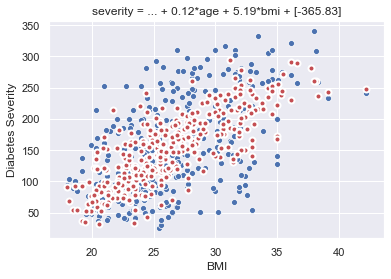

In [2355]:
fig = sns.scatterplot(x=X_train['bmi'].values, y=y_train.values.flatten())
print(lr_multi.coef_)
print(lr_multi.predict(X_train).flatten().shape)
fig = sns.scatterplot(X_train['bmi'], lr_multi.predict(X_train).flatten(), color='r', linewidth=2)
plt.xlabel('BMI')
plt.ylabel('Diabetes Severity')
# print(lr_multi_coef['age'])
# print(lr_multi_coef['bmi'])
plt.title(f'severity = ... + {lr_multi_coef["age"].round(2)}*age + {lr_multi_coef["bmi"].round(2)}*bmi + {lr_multi.intercept_.round(2)}')
print(f'lr_multi.intercept_: {lr_multi.intercept_.round(2)}')
print('     lr_multi_coef_:')
print(lr_multi_coef.round(2))

Let's create a function that we can use to train a model and measure it's accuracy.  
API:
   Inputs:
       model: untrained sklearn model object (this will allow us to use any model we like)
       X_train, y_train: training set of features (X) and target labels (y), defaults to the entire original train_test_split
       X_test, y_test: test set to measure accuracy on an unseen dataset
   Outputs:
       Dictionary of model hyperparameters (class name, features), trained parameters (coefficients, intercept), and performance (RMSE, MAE, pierson correlation score)
       

In [2356]:
def fit_evaluate_model(model=LinearRegression(), 
                       X_train=X_train[features], y_train=y_train, 
                       X_test=X_test[features], y_test=y_test,
                       hyperparams=hyperparams):
    features = list(X_train.columns)
    hyperparams.update({
        'model': model.__class__.__name__,
        'num_features': len(features),
        'num_samples': len(X_train)
        })
    model = model.fit(X_train, np.array(y_train).reshape(-1,1))
    print(f'model.intercept_: {model.intercept_.round(2)}')
    print('model_coef:')
    model_coef = pd.Series(model.coef_.flatten(), index=features)
    print(model_coef.round(2))
    y_train_pred = model.predict(X_train[features]).flatten()
    e_train = (np.array(y_train_pred).flatten() - np.array(y_train).flatten())
    mae_train = np.sum(np.abs(e_train)) / len(e_train)  # .mean()
    rmse_train = np.sqrt((e_train ** 2).mean())
    hyperparams.update({'train_score': model.score(X_train[features], y_train),
                        'train_rmse': rmse_train,
                        'train_mae': mae_train})

    y_test_pred = model.predict(X_test[features]).flatten()
    e_test = y_test_pred - y_test.values[:,0]
    mae_test = np.sum(np.abs(e_test)) / len(e_test)  # .mean()
    rmse_test = np.sqrt((e_test ** 2).mean())

    hyperparams.update({'test_score': model.score(X_test[features], y_test),
                        'test_rmse': rmse_test,
                        'test_mae': mae_test})
    results_series = pd.concat([pd.Series(hyperparams), model_coef])

    return results_series

In [2357]:
lr_multi = LinearRegression()
results.append(fit_evaluate_model(model=lr_multi))

model.intercept_: [-365.83]
model_coef:
age     0.12
sex   -27.86
bmi     5.19
bp      1.27
tc     -1.33
ldl     0.92
hdl     0.86
tch    10.64
ltg    73.17
glu     0.16
dtype: float64


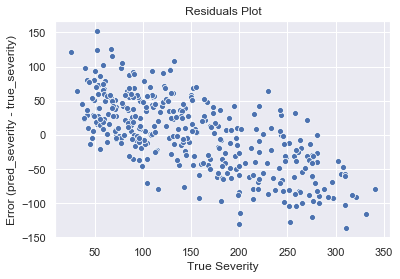

In [2358]:
e_train = lr_multi.predict(X_train).flatten() - np.array(y_train).flatten()
fig = sns.scatterplot(x=np.array(y_train).flatten(), y=e_train)
ylab = plt.ylabel('Error (pred_severity - true_severity)')
xlab = plt.xlabel('True Severity')
titl = plt.title('Residuals Plot')

In [2359]:
lr_en = ElasticNet()
results.append(fit_evaluate_model(model=lr_en))

model.intercept_: [-117.42]
model_coef:
age    0.13
sex   -7.07
bmi    5.76
bp     1.19
tc     1.14
ldl   -1.24
hdl   -1.96
tch    1.04
ltg    3.15
glu    0.15
dtype: float64


In [2360]:
lr_lasso = Lasso()
results.append(fit_evaluate_model(model=lr_lasso))
# results[-1]['description'] ='lasso on original features'

model.intercept_: [-224.65]
model_coef:
age     0.14
sex   -22.24
bmi     5.45
bp      1.25
tc     -0.03
ldl    -0.17
hdl    -0.81
tch     3.42
ltg    37.86
glu     0.16
dtype: float64


In [2361]:
df_results = pd.DataFrame(results).sort_values(['test_rmse'])
df_results.round(2)

,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
45,0.15,1,LinearRegression,12,375,0.53,0.17,0.14,0.42,0.17,0.13,-0.00,-0.07,0.46,0.23,-0.71,0.43,0.06,0.22,0.59,0.04,0.07,-0.06,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,0.20,1,LinearRegression,12,353,0.53,0.17,0.14,0.44,0.17,0.13,-0.02,-0.08,0.44,0.25,-0.51,0.27,-0.05,0.11,0.55,0.05,0.05,0.04,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,0.10,0,LinearRegression,12,397,0.53,0.17,0.13,0.36,0.17,0.14,-0.03,-0.07,0.43,0.25,-0.50,0.27,0.03,0.06,0.58,0.06,0.03,0.11,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,0.20,2,LinearRegression,12,353,0.53,0.17,0.13,0.43,0.17,0.14,-0.00,-0.06,0.42,0.26,-0.90,0.79,0.12,0.26,0.71,0.05,-0.01,-0.31,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,0.20,3,LinearRegression,12,353,0.54,0.16,0.13,0.42,0.18,0.14,-0.00,-0.06,0.42,0.26,-0.79,0.39,0.13,0.18,0.59,0.06,0.05,0.10,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.20,1,LinearRegression,1,353,0.36,62.19,165.00,0.25,63.17,40.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,0.20,3,LinearRegression,1,353,0.36,62.10,164.69,0.25,63.53,41.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2362]:
X_train['ldl_x_hdl'] = X_train['ldl'] * X_train['hdl']
X_test['ldl_x_hdl'] = X_test['ldl'] * X_test['hdl']
lr_cholest = LinearRegression()
results.append(fit_evaluate_model(model=lr_cholest, X_train=X_train, X_test=X_test))
df_results = pd.DataFrame(results).sort_values(['test_rmse'])
df_results.round(2)

model.intercept_: [-382.22]
model_coef:
age           0.14
sex         -27.78
bmi           5.21
bp            1.27
tc           -1.24
ldl           1.13
hdl           1.22
tch           8.67
ltg          72.21
glu           0.13
ldl_x_hdl    -0.01
dtype: float64


,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
45,0.15,1,LinearRegression,12,375,0.53,0.17,0.14,0.42,0.17,0.13,-0.00,-0.07,0.46,0.23,-0.71,0.43,0.06,0.22,0.59,0.04,0.07,-0.06,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,0.20,1,LinearRegression,12,353,0.53,0.17,0.14,0.44,0.17,0.13,-0.02,-0.08,0.44,0.25,-0.51,0.27,-0.05,0.11,0.55,0.05,0.05,0.04,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,0.10,0,LinearRegression,12,397,0.53,0.17,0.13,0.36,0.17,0.14,-0.03,-0.07,0.43,0.25,-0.50,0.27,0.03,0.06,0.58,0.06,0.03,0.11,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,0.20,2,LinearRegression,12,353,0.53,0.17,0.13,0.43,0.17,0.14,-0.00,-0.06,0.42,0.26,-0.90,0.79,0.12,0.26,0.71,0.05,-0.01,-0.31,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,0.20,3,LinearRegression,12,353,0.54,0.16,0.13,0.42,0.18,0.14,-0.00,-0.06,0.42,0.26,-0.79,0.39,0.13,0.18,0.59,0.06,0.05,0.10,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.20,1,LinearRegression,1,353,0.36,62.19,165.00,0.25,63.17,40.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,0.20,3,LinearRegression,1,353,0.36,62.10,164.69,0.25,63.53,41.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2363]:
X_train['ldl_d_hdl'] = X_train['ldl'] / X_train['hdl']
X_test['ldl_d_hdl'] = X_test['ldl'] / X_test['hdl']
lr_cholest = LinearRegression()
results.append(fit_evaluate_model(model=lr_cholest, X_train=X_train, X_test=X_test))
df_results = pd.DataFrame(results).sort_values(['test_rmse'])
df_results.round(2)

model.intercept_: [-371.83]
model_coef:
age           0.12
sex         -27.79
bmi           5.21
bp            1.27
tc           -1.15
ldl           0.76
hdl           1.03
tch           5.22
ltg          71.68
glu           0.14
ldl_x_hdl    -0.00
ldl_d_hdl     9.43
dtype: float64


,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
45,0.15,1,LinearRegression,12,375,0.53,0.17,0.14,0.42,0.17,0.13,-0.00,-0.07,0.46,0.23,-0.71,0.43,0.06,0.22,0.59,0.04,0.07,-0.06,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,0.20,1,LinearRegression,12,353,0.53,0.17,0.14,0.44,0.17,0.13,-0.02,-0.08,0.44,0.25,-0.51,0.27,-0.05,0.11,0.55,0.05,0.05,0.04,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,0.10,0,LinearRegression,12,397,0.53,0.17,0.13,0.36,0.17,0.14,-0.03,-0.07,0.43,0.25,-0.50,0.27,0.03,0.06,0.58,0.06,0.03,0.11,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,0.20,2,LinearRegression,12,353,0.53,0.17,0.13,0.43,0.17,0.14,-0.00,-0.06,0.42,0.26,-0.90,0.79,0.12,0.26,0.71,0.05,-0.01,-0.31,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,0.20,3,LinearRegression,12,353,0.54,0.16,0.13,0.42,0.18,0.14,-0.00,-0.06,0.42,0.26,-0.79,0.39,0.13,0.18,0.59,0.06,0.05,0.10,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.20,1,LinearRegression,1,353,0.36,62.19,165.00,0.25,63.17,40.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78,0.20,3,LinearRegression,1,353,0.36,62.10,164.69,0.25,63.53,41.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2364]:
from sklearn import preprocessing

x_scaler = preprocessing.MinMaxScaler()
x_scaler.fit(X_train)
X_train_scaled = pd.DataFrame(x_scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(x_scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_test_scaled.head()

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl
55,0.300000,0.0,0.157025,0.309859,0.426471,0.342561,0.662338,0.159236,0.229527,0.465517,0.549766,0.153295
11,0.616667,1.0,0.413223,0.323944,0.426471,0.595156,0.129870,0.636943,0.114220,0.189655,0.289747,0.810864
415,0.466667,0.0,0.380165,0.253521,0.544118,0.599769,0.207792,0.636943,0.542630,0.448276,0.375097,0.665716
406,0.233333,0.0,0.037190,0.112676,0.318627,0.289504,0.480519,0.159236,0.269332,-0.137931,0.364030,0.189375
369,0.450000,0.0,0.491736,0.295775,0.362745,0.411765,0.207792,0.398089,0.465759,0.551724,0.257513,0.486141


In [2365]:
y_scaler = preprocessing.MinMaxScaler()
y_scaler.fit(y_train)
y_train_scaled = pd.DataFrame(y_scaler.transform(y_train), columns=y_train.columns, index=y_train.index)
y_test_scaled = pd.DataFrame(y_scaler.transform(y_test), columns=y_test.columns, index=y_test.index)
y_test_scaled.head()


,severity
55,0.325949
11,0.139241
415,0.471519
406,0.148734
369,0.449367


In [2366]:
lr_scaled = LinearRegression()
results.append(fit_evaluate_model(model=lr_scaled,
                                  X_train=X_train_scaled, X_test=X_test_scaled,
                                  y_train=y_train_scaled, y_test=y_test_scaled))
results[-1]['x_scaler'] = x_scaler.__class__.__name__
results[-1]['y_scaler'] = y_scaler.__class__.__name__
df_results = pd.DataFrame(results).sort_values(['test_score'], ascending=False)
df_results.round(2)

model.intercept_: [-0.16]
model_coef:
age          0.02
sex         -0.09
bmi          0.40
bp           0.29
tc          -0.74
ldl          0.42
hdl          0.25
tch          0.10
ltg          0.65
glu          0.03
ldl_x_hdl   -0.07
ldl_d_hdl    0.14
dtype: float64


,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
93,0.20,4,ElasticNet,10,353,0.49,55.60,45.81,0.48,53.43,42.41,0.13,-7.07,5.76,1.19,1.14,-1.24,-1.96,1.04,3.15,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,0.20,4,Lasso,10,353,0.52,53.94,43.91,0.48,53.49,42.40,0.14,-22.24,5.45,1.25,-0.03,-0.17,-0.81,3.42,37.86,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,0.20,4,LinearRegression,10,353,0.53,53.51,43.34,0.46,54.22,42.78,0.12,-27.86,5.19,1.27,-1.33,0.92,0.86,10.64,73.17,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,0.20,4,LinearRegression,11,353,0.53,53.48,43.32,0.46,54.52,43.07,0.14,-27.78,5.21,1.27,-1.24,1.13,1.22,8.67,72.21,0.13,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,0.20,4,LinearRegression,12,353,0.53,0.17,0.14,0.45,0.17,0.14,0.02,-0.09,0.40,0.29,-0.74,0.42,0.25,0.10,0.65,0.03,-0.07,0.14,MinMaxScaler,MinMaxScaler,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.20,1,LinearRegression,1,353,0.36,62.19,165.00,0.25,63.17,40.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.10,0,LinearRegression,1,397,0.36,62.36,185.22,0.19,62.57,20.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Check out the residuals plot for the best model we've created so far (model id=1 a LinearRegression with 10 unscaled features).    
Do you see any pattern in this error between your predictions and the truth?  
This will help you think of ways to engineer some new features.

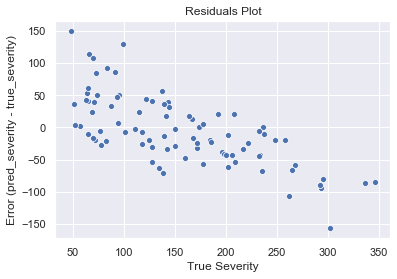

In [2367]:
def plot_residuals(y, y_pred):
    e = np.array(y_pred).flatten() - np.array(y).flatten()
    fig = sns.scatterplot(x=np.array(y).flatten(), y=e)
    plt.ylabel('Error (pred_severity - true_severity)')
    plt.xlabel('True Severity')
    plt.title('Residuals Plot')
    return fig

fig = plot_residuals(y_test, lr_multi.predict(X_test[features]))

It seems that a LinearRegression overestimates severity for low severity patients.  
And it underestimates severity for patients that developer sever diabetes.  
You can square or take the exponent of our features to give the LinearRegression model curvature.  

In [2368]:
(X_train ** 2).isnull().sum()

age          0
sex          0
bmi          0
bp           0
tc           0
ldl          0
hdl          0
tch          0
ltg          0
glu          0
ldl_x_hdl    0
ldl_d_hdl    0
dtype: int64

In [2369]:
X_train2 = pd.concat([X_train, X_train ** 2], axis=1)
X_train2.columns = list(X_train.columns) + [c + '2' for c in X_train.columns]

X_test2 = pd.concat([X_test, X_test ** 2], axis=1) 
X_test2.columns = list(X_test.columns) + [c + '2' for c in X_test.columns]

In [2370]:
lr_sqrd = LinearRegression()
results.append(fit_evaluate_model(model=lr_sqrd,
                                  X_train=X_train2, X_test=X_test2,
                                  y_train=y_train, y_test=y_test))
df_results = pd.DataFrame(results).sort_values(['test_score'], ascending=False)
df_results.round(2)

model.intercept_: [1203.73]
model_coef:
age           -2.71
sex           -2.69
bmi           -3.64
bp            -0.91
tc            -6.83
              ...  
tch2           0.87
ltg2          76.70
glu2           0.03
ldl_x_hdl2     0.00
ldl_d_hdl2     0.90
Length: 24, dtype: float64


,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
98,0.20,4,LinearRegression,24,353,0.56,51.82,41.58,0.48,53.41,42.31,-2.71,-2.69,-3.64,-0.91,-6.83,8.60,10.15,-1.78,-504.86,-5.56,-0.04,-7.85,NaN,NaN,0.03,-8.07,0.16,0.01,-0.0,-0.0,-0.02,0.87,76.7,0.03,0.0,0.9,NaN
93,0.20,4,ElasticNet,10,353,0.49,55.60,45.81,0.48,53.43,42.41,0.13,-7.07,5.76,1.19,1.14,-1.24,-1.96,1.04,3.15,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,0.20,4,Lasso,10,353,0.52,53.94,43.91,0.48,53.49,42.40,0.14,-22.24,5.45,1.25,-0.03,-0.17,-0.81,3.42,37.86,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,0.20,4,LinearRegression,10,353,0.53,53.51,43.34,0.46,54.22,42.78,0.12,-27.86,5.19,1.27,-1.33,0.92,0.86,10.64,73.17,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,0.20,4,LinearRegression,11,353,0.53,53.48,43.32,0.46,54.52,43.07,0.14,-27.78,5.21,1.27,-1.24,1.13,1.22,8.67,72.21,0.13,-0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.20,1,LinearRegression,1,353,0.36,62.19,165.00,0.25,63.17,40.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.10,0,LinearRegression,1,397,0.36,62.36,185.22,0.19,62.57,20.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2371]:
lr_sqrd_lasso = Lasso()
results.append(fit_evaluate_model(model=lr_sqrd_lasso,
                                  X_train=X_train2, X_test=X_test2,
                                  y_train=y_train, y_test=y_test))
df_results = pd.DataFrame(results).sort_values(['test_score'], ascending=False)
df_results.round(2)

model.intercept_: [213.01]
model_coef:
age          -2.76
sex          -0.00
bmi          -0.00
bp           -0.39
tc           -1.44
              ... 
tch2          0.41
ltg2          9.14
glu2          0.03
ldl_x_hdl2    0.00
ldl_d_hdl2    0.71
Length: 24, dtype: float64


/Users/hobs/opt/anaconda3/envs/dsdh/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 478643.0168512625, tolerance: 213.51301246458925
  positive)


,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
98,0.20,4,LinearRegression,24,353,0.56,51.82,41.58,0.48,53.41,42.31,-2.71,-2.69,-3.64,-0.91,-6.83,8.60,10.15,-1.78,-504.86,-5.56,-0.04,-7.85,NaN,NaN,0.03,-8.07,0.16,0.01,-0.0,-0.0,-0.02,0.87,76.70,0.03,0.0,0.90,NaN
93,0.20,4,ElasticNet,10,353,0.49,55.60,45.81,0.48,53.43,42.41,0.13,-7.07,5.76,1.19,1.14,-1.24,-1.96,1.04,3.15,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,0.20,4,Lasso,10,353,0.52,53.94,43.91,0.48,53.49,42.40,0.14,-22.24,5.45,1.25,-0.03,-0.17,-0.81,3.42,37.86,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,0.20,4,Lasso,24,353,0.55,52.32,42.40,0.47,53.96,42.16,-2.76,-0.00,-0.00,-0.39,-1.44,1.37,1.79,0.00,0.00,-4.92,-0.01,0.00,NaN,NaN,0.03,-8.47,0.10,0.01,-0.0,0.0,-0.00,0.41,9.14,0.03,0.0,0.71,NaN
92,0.20,4,LinearRegression,10,353,0.53,53.51,43.34,0.46,54.22,42.78,0.12,-27.86,5.19,1.27,-1.33,0.92,0.86,10.64,73.17,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.20,1,LinearRegression,1,353,0.36,62.19,165.00,0.25,63.17,40.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.10,0,LinearRegression,1,397,0.36,62.36,185.22,0.19,62.57,20.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2372]:
lr_sqrd_elast = ElasticNet()
results.append(fit_evaluate_model(model=lr_sqrd_elast,
                                  X_train=X_train2, X_test=X_test2,
                                  y_train=y_train, y_test=y_test))
results[-1]['alpha'] = lr_sqrd_elast.alpha
df_results = pd.DataFrame(results).sort_values(['test_score'], ascending=False)
df_results.round(2)

model.intercept_: [163.86]
model_coef:
age          -2.49
sex          -1.48
bmi          -0.17
bp           -0.81
tc           -0.62
              ... 
tch2          0.19
ltg2          7.09
glu2          0.02
ldl_x_hdl2    0.00
ldl_d_hdl2    1.01
Length: 24, dtype: float64


/Users/hobs/opt/anaconda3/envs/dsdh/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 473282.4547873719, tolerance: 213.51301246458925
  positive)


,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
98,0.20,4,LinearRegression,24,353,0.56,51.82,41.58,0.48,53.41,42.31,-2.71,-2.69,-3.64,-0.91,-6.83,8.60,10.15,-1.78,-504.86,-5.56,-0.04,-7.85,NaN,NaN,0.03,-8.07,0.16,0.01,-0.0,-0.0,-0.02,0.87,76.70,0.03,0.0,0.90,NaN
93,0.20,4,ElasticNet,10,353,0.49,55.60,45.81,0.48,53.43,42.41,0.13,-7.07,5.76,1.19,1.14,-1.24,-1.96,1.04,3.15,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,0.20,4,Lasso,10,353,0.52,53.94,43.91,0.48,53.49,42.40,0.14,-22.24,5.45,1.25,-0.03,-0.17,-0.81,3.42,37.86,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,0.20,4,ElasticNet,24,353,0.54,52.57,42.73,0.47,53.84,42.08,-2.49,-1.48,-0.17,-0.81,-0.62,0.77,1.38,0.00,0.00,-3.38,-0.02,0.00,NaN,NaN,0.03,-6.43,0.10,0.01,-0.0,0.0,-0.00,0.19,7.09,0.02,0.0,1.01,1.0
99,0.20,4,Lasso,24,353,0.55,52.32,42.40,0.47,53.96,42.16,-2.76,-0.00,-0.00,-0.39,-1.44,1.37,1.79,0.00,0.00,-4.92,-0.01,0.00,NaN,NaN,0.03,-8.47,0.10,0.01,-0.0,0.0,-0.00,0.41,9.14,0.03,0.0,0.71,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.20,1,LinearRegression,1,353,0.36,62.19,165.00,0.25,63.17,40.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.10,0,LinearRegression,1,397,0.36,62.36,185.22,0.19,62.57,20.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2373]:
### BEGIN SOLUTION
lr_sqrd_ridge = Ridge()
results.append(fit_evaluate_model(model=lr_sqrd_ridge,
                                  X_train=X_train2, X_test=X_test2,
                                  y_train=y_train, y_test=y_test))
### END SOLUTION
results[-1]['alpha'] = lr_sqrd_ridge.alpha
df_results = pd.DataFrame(results).sort_values(['test_score'], ascending=False)
df_results.round(2)

/Users/hobs/opt/anaconda3/envs/dsdh/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=4.24208e-18): result may not be accurate.
  overwrite_a=True).T


model.intercept_: [232.96]
model_coef:
age           -2.91
sex           -2.67
bmi           -3.85
bp            -0.74
tc            -3.07
              ...  
tch2           0.30
ltg2          13.54
glu2           0.03
ldl_x_hdl2     0.00
ldl_d_hdl2     1.04
Length: 24, dtype: float64


,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
98,0.20,4,LinearRegression,24,353,0.56,51.82,41.58,0.48,53.41,42.31,-2.71,-2.69,-3.64,-0.91,-6.83,8.60,10.15,-1.78,-504.86,-5.56,-0.04,-7.85,NaN,NaN,0.03,-8.07,0.16,0.01,-0.0,-0.00,-0.02,0.87,76.70,0.03,0.0,0.90,NaN
93,0.20,4,ElasticNet,10,353,0.49,55.60,45.81,0.48,53.43,42.41,0.13,-7.07,5.76,1.19,1.14,-1.24,-1.96,1.04,3.15,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,0.20,4,Lasso,10,353,0.52,53.94,43.91,0.48,53.49,42.40,0.14,-22.24,5.45,1.25,-0.03,-0.17,-0.81,3.42,37.86,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,0.20,4,Ridge,24,353,0.55,52.12,42.00,0.47,53.57,42.62,-2.91,-2.67,-3.85,-0.74,-3.07,4.53,6.81,3.12,-21.13,-5.92,-0.05,-2.61,NaN,NaN,0.03,-8.00,0.16,0.01,0.0,-0.01,-0.02,0.30,13.54,0.03,0.0,1.04,1.0
100,0.20,4,ElasticNet,24,353,0.54,52.57,42.73,0.47,53.84,42.08,-2.49,-1.48,-0.17,-0.81,-0.62,0.77,1.38,0.00,0.00,-3.38,-0.02,0.00,NaN,NaN,0.03,-6.43,0.10,0.01,-0.0,0.00,-0.00,0.19,7.09,0.02,0.0,1.01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.20,1,LinearRegression,1,353,0.36,62.19,165.00,0.25,63.17,40.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.10,0,LinearRegression,1,397,0.36,62.36,185.22,0.19,62.57,20.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2374]:
### BEGIN SOLUTION
lr_sqrd_ridge = Ridge(alpha=1000)
results.append(fit_evaluate_model(model=lr_sqrd_ridge,
                                  X_train=X_train2, X_test=X_test2,
                                  y_train=y_train, y_test=y_test))
results[-1]['alpha'] = lr_sqrd_ridge.alpha
### END SOLUTION
df_results = pd.DataFrame(results).sort_values(['test_score'], ascending=False)
df_results.round(2)


model.intercept_: [69.74]
model_coef:
age          -1.60
sex          -1.13
bmi          -0.17
bp           -0.69
tc            0.34
              ... 
tch2         -0.01
ltg2          3.48
glu2          0.01
ldl_x_hdl2    0.00
ldl_d_hdl2    0.56
Length: 24, dtype: float64


,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
98,0.20,4,LinearRegression,24,353,0.56,51.82,41.58,0.48,53.41,42.31,-2.71,-2.69,-3.64,-0.91,-6.83,8.60,10.15,-1.78,-504.86,-5.56,-0.04,-7.85,NaN,NaN,0.03,-8.07,0.16,0.01,-0.0,-0.00,-0.02,0.87,76.70,0.03,0.0,0.90,NaN
93,0.20,4,ElasticNet,10,353,0.49,55.60,45.81,0.48,53.43,42.41,0.13,-7.07,5.76,1.19,1.14,-1.24,-1.96,1.04,3.15,0.15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,0.20,4,Lasso,10,353,0.52,53.94,43.91,0.48,53.49,42.40,0.14,-22.24,5.45,1.25,-0.03,-0.17,-0.81,3.42,37.86,0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,0.20,4,Ridge,24,353,0.52,53.64,44.02,0.47,53.54,42.00,-1.60,-1.13,-0.17,-0.69,0.34,0.22,0.61,0.01,0.43,-1.37,-0.02,0.02,NaN,NaN,0.02,-3.39,0.11,0.01,-0.0,0.00,-0.00,-0.01,3.48,0.01,0.0,0.56,1000.0
101,0.20,4,Ridge,24,353,0.55,52.12,42.00,0.47,53.57,42.62,-2.91,-2.67,-3.85,-0.74,-3.07,4.53,6.81,3.12,-21.13,-5.92,-0.05,-2.61,NaN,NaN,0.03,-8.00,0.16,0.01,0.0,-0.01,-0.02,0.30,13.54,0.03,0.0,1.04,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.20,1,LinearRegression,1,353,0.36,62.19,165.00,0.25,63.17,40.58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.10,0,LinearRegression,1,397,0.36,62.36,185.22,0.19,62.57,20.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.20,0,LinearRegression,1,353,0.38,61.87,163.21,0.19,64.43,42.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2375]:
### BEGIN SOLUTION
lr_sqrd_lasso100 = Lasso(alpha=100)
results.append(fit_evaluate_model(model=lr_sqrd_lasso100,
                                  X_train=X_train2, X_test=X_test2,
                                  y_train=y_train, y_test=y_test))
results[-1]['alpha'] = lr_sqrd_lasso100.alpha
### END SOLUTION
df_results = pd.DataFrame(results).sort_values(['test_score'], ascending=False)
df_results.round(3)

model.intercept_: [33.94]
model_coef:
age          -0.0
sex          -0.0
bmi           0.0
bp           -0.0
tc            0.0
             ... 
tch2          0.0
ltg2          0.0
glu2          0.0
ldl_x_hdl2    0.0
ldl_d_hdl2    0.0
Length: 24, dtype: float64


,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha
98,0.20,4,LinearRegression,24,353,0.556,51.818,41.576,0.477,53.405,42.311,-2.711,-2.689,-3.645,-0.911,-6.829,8.599,10.151,-1.780,-504.858,-5.564,-0.045,-7.851,NaN,NaN,0.032,-8.068,0.156,0.011,-0.000,-0.004,-0.018,0.867,76.698,0.030,0.0,0.896,NaN
93,0.20,4,ElasticNet,10,353,0.489,55.596,45.808,0.477,53.432,42.412,0.127,-7.070,5.763,1.192,1.143,-1.243,-1.963,1.043,3.154,0.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,0.20,4,Lasso,10,353,0.519,53.938,43.906,0.475,53.492,42.398,0.142,-22.238,5.447,1.250,-0.029,-0.170,-0.810,3.423,37.864,0.164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,0.20,4,Ridge,24,353,0.524,53.639,44.020,0.474,53.540,41.999,-1.596,-1.131,-0.174,-0.687,0.338,0.224,0.611,0.009,0.432,-1.371,-0.024,0.019,NaN,NaN,0.019,-3.392,0.108,0.010,-0.001,0.000,-0.003,-0.014,3.477,0.008,0.0,0.562,1000.0
101,0.20,4,Ridge,24,353,0.551,52.121,41.999,0.474,53.569,42.617,-2.914,-2.665,-3.853,-0.743,-3.066,4.531,6.807,3.119,-21.127,-5.915,-0.047,-2.611,NaN,NaN,0.034,-7.996,0.164,0.011,0.001,-0.005,-0.022,0.304,13.539,0.032,0.0,1.037,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.20,1,LinearRegression,1,353,0.363,62.193,165.003,0.251,63.165,40.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,0.10,0,LinearRegression,1,397,0.355,62.365,185.225,0.191,62.569,20.459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,0.20,0,LinearRegression,1,353,0.376,61.869,163.211,0.191,64.426,42.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.20,0,LinearRegression,1,353,0.376,61.869,163.211,0.191,64.426,42.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2376]:
df_results['overfitness'] = (df_results['train_score'] - df_results['test_score']) / df_results['train_score']
df_results.round(3)

,test_size,seed,model,num_features,num_samples,train_score,train_rmse,train_mae,test_score,test_rmse,test_mae,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,ldl_x_hdl,ldl_d_hdl,x_scaler,y_scaler,age2,sex2,bmi2,bp2,tc2,ldl2,hdl2,tch2,ltg2,glu2,ldl_x_hdl2,ldl_d_hdl2,alpha,overfitness
98,0.20,4,LinearRegression,24,353,0.556,51.818,41.576,0.477,53.405,42.311,-2.711,-2.689,-3.645,-0.911,-6.829,8.599,10.151,-1.780,-504.858,-5.564,-0.045,-7.851,NaN,NaN,0.032,-8.068,0.156,0.011,-0.000,-0.004,-0.018,0.867,76.698,0.030,0.0,0.896,NaN,0.142
93,0.20,4,ElasticNet,10,353,0.489,55.596,45.808,0.477,53.432,42.412,0.127,-7.070,5.763,1.192,1.143,-1.243,-1.963,1.043,3.154,0.149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025
94,0.20,4,Lasso,10,353,0.519,53.938,43.906,0.475,53.492,42.398,0.142,-22.238,5.447,1.250,-0.029,-0.170,-0.810,3.423,37.864,0.164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.084
102,0.20,4,Ridge,24,353,0.524,53.639,44.020,0.474,53.540,41.999,-1.596,-1.131,-0.174,-0.687,0.338,0.224,0.611,0.009,0.432,-1.371,-0.024,0.019,NaN,NaN,0.019,-3.392,0.108,0.010,-0.001,0.000,-0.003,-0.014,3.477,0.008,0.0,0.562,1000.0,0.095
101,0.20,4,Ridge,24,353,0.551,52.121,41.999,0.474,53.569,42.617,-2.914,-2.665,-3.853,-0.743,-3.066,4.531,6.807,3.119,-21.127,-5.915,-0.047,-2.611,NaN,NaN,0.034,-7.996,0.164,0.011,0.001,-0.005,-0.022,0.304,13.539,0.032,0.0,1.037,1.0,0.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.20,1,LinearRegression,1,353,0.363,62.193,165.003,0.251,63.165,40.575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.308
26,0.10,0,LinearRegression,1,397,0.355,62.365,185.225,0.191,62.569,20.459,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.462
13,0.20,0,LinearRegression,1,353,0.376,61.869,163.211,0.191,64.426,42.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493
0,0.20,0,LinearRegression,1,353,0.376,61.869,163.211,0.191,64.426,42.450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.493
